In [37]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# Read the data
data = pd.read_csv(r'movies.csv')

### Exploring Dataset

In [3]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [42]:
# Let's see if there's any missing data

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} : {}%'.format(col,round(pct_missing*100)))

name : 0%
rating : 1%
genre : 0%
year : 0%
released : 0%
score : 0%
votes : 0%
director : 0%
writer : 0%
star : 0%
country : 0%
budget : 28%
gross : 2%
company : 0%
runtime : 0%


In [5]:
# Viewing Data types for our columns

data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Data Cleaning

In [17]:
# Fill null values
df = data.fillna(0)

In [18]:
# Change datatype of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [19]:
# Making new column for correct year

df['released'] = df['released'].astype(str)
df['crtYear'] = df['released']

i=0
for x in df['released']:
    df['crtYear'][i] = re.findall(r'\d{4}',x)
    i = i+1

df['crtYear'] = df['crtYear'].astype(str).str[2:-2]

C:\Users\Sayeed97\AppData\Local\Temp\ipykernel_10992\959622851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crtYear'][i] = re.findall(r'\d{4}',x)


In [20]:
df.sort_values(by=['gross'],inplace=True, ascending=False)

In [43]:
# Getting an idea of numerical fields in dataset
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.00,2000.0,2010.0,2.020000e+03
score,7668.0,6.387911e+00,9.768622e-01,0.0,5.80,6.5,7.1,9.300000e+00
votes,7668.0,8.807403e+04,1.633011e+05,0.0,9100.00,33000.0,93000.0,2.400000e+06
budget,7668.0,2.551350e+07,3.858954e+07,0.0,0.00,12000000.0,32000000.0,3.560000e+08
gross,7668.0,7.656567e+07,1.641217e+08,0.0,3860581.75,18955434.5,72620218.5,2.847246e+09
runtime,7668.0,1.072057e+02,1.873718e+01,0.0,95.00,104.0,116.0,3.660000e+02


In [44]:
# Getting an idea of the Object values in our dataset

df.describe(include = ['O']).T

,count,unique,top,freq
name,7668,7512,Nobody's Fool,3
rating,7668,13,R,3697
genre,7668,19,Comedy,2245
released,7668,3415,"February 14, 1986 (United States)",9
director,7668,2949,Woody Allen,38
writer,7668,4536,Woody Allen,37
star,7668,2815,Nicolas Cage,43
country,7668,60,United States,5475
company,7668,2386,Universal Pictures,377
crtYear,7668,42,2019,228


In [26]:
#pd.set_option('display.max_rows',None)

### Data Visualization

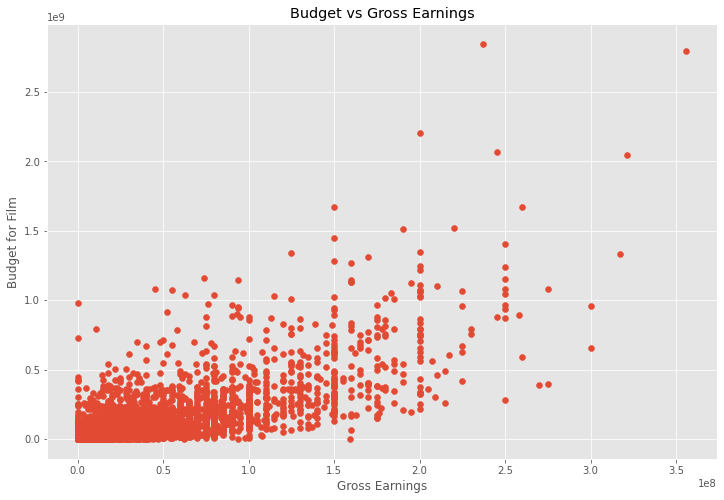

In [10]:
# ScatterPlot for budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [12]:
# Let's view numerical fields correlation
data.corr() #pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [13]:
# High correlation b/w budget and gross

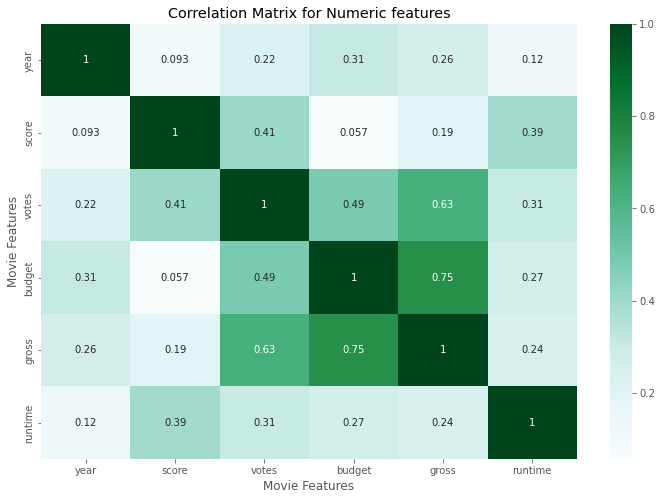

In [46]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn')

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [35]:
# Converting object type columns to category(numeric)
df_numerized = df

for cols in df_numerized.columns:
    if(df_numerized[cols].dtype == 'object'):
        df_numerized[cols] = df_numerized[cols].astype('category')
        df_numerized[cols] = df_numerized[cols].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,crtYear
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,30
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,40
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,18
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,36
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,39


In [88]:
#df.head()

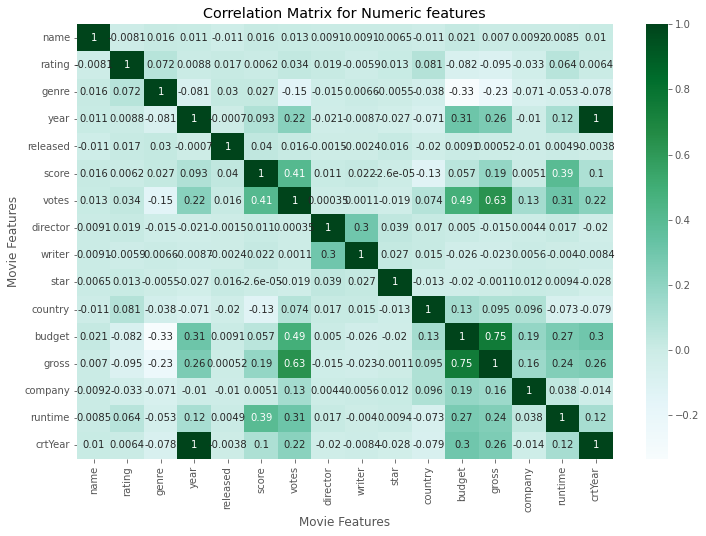

In [47]:
# Correlation Map for all columns

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn')

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.016377
          votes       0.013038
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.006989
          company     0.009211
          runtime     0.008483
          crtYear     0.010225
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score       0.006192
          votes       0.033743
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095450
          company    -0.032943
          runtime     0.064133
          crtYear     0.006403
genre   

In [34]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)> 0.5]
high_corr

gross     votes       0.632870
votes     gross       0.632870
budget    gross       0.750157
gross     budget      0.750157
crtYear   year        0.996397
year      crtYear     0.996397
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
crtYear   crtYear     1.000000
dtype: float64

<AxesSubplot:xlabel='budget', ylabel='gross'>

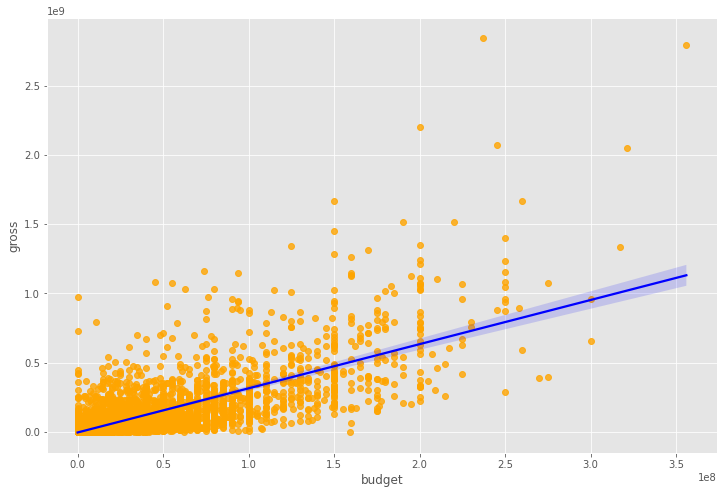

In [49]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'orange'},line_kws={'color':'blue'})

<AxesSubplot:xlabel='budget', ylabel='gross'>

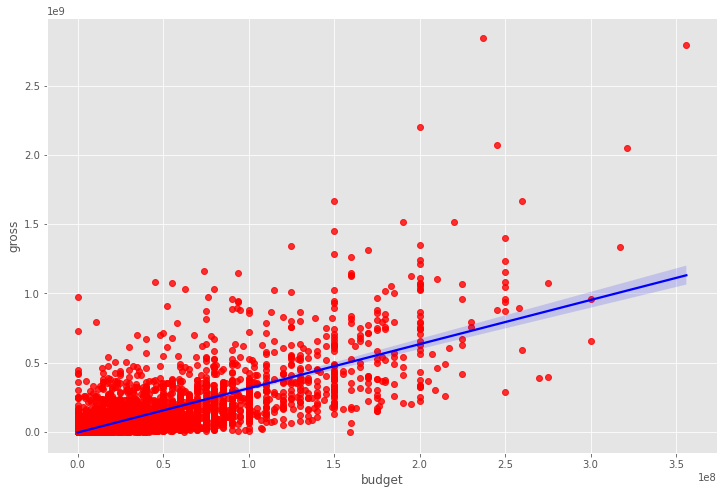

In [54]:
# Plot Vote vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [67]:
# Comparing top 10 companies by budget & gross
comp = df.groupby('company')['budget','gross'].sum().sort_values(by='gross',ascending=False)
comp = comp.head(10)
comp

C:\Users\Sayeed97\AppData\Local\Temp\ipykernel_10992\4235056492.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comp = df.groupby('company')['budget','gross'].sum().sort_values(by='gross',ascending=False)


,budget,gross
company,,
Warner Bros.,19568300000,56491421806
Universal Pictures,15989730001,52514188890
Columbia Pictures,15512107000,43008941346
Paramount Pictures,13723450000,40493607415
Twentieth Century Fox,11474600000,40257053857
Walt Disney Pictures,10404700000,36327887792
New Line Cinema,5648200000,19883797684
Marvel Studios,2664000000,15065592411
DreamWorks Animation,3344000000,11873612858


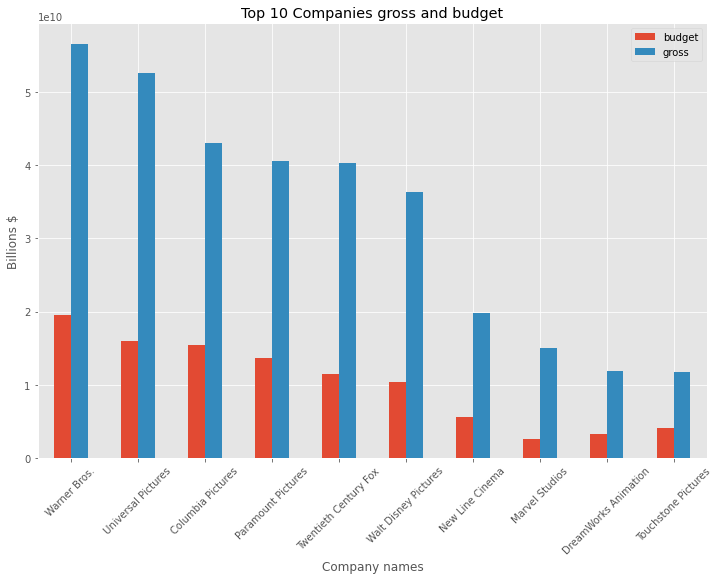

In [79]:
# Plotting top 10 grossing companies

br = comp.plot.bar(rot=0)

# defining x-axis values to make it clear
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],rotation='45')
plt.title("Top 10 Companies gross and budget")
plt.xlabel("Company names")
plt.ylabel("Billions $")

plt.show()

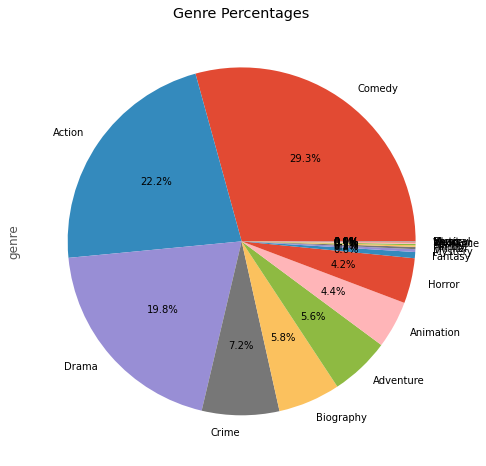

In [87]:
# Genre Comparison

df['genre'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Genre Percentages')
plt.show()

In [ ]:
# Votes and Budget have high correlation to gross earnings

# Company has low correlation
# Time lapse for movies goes from 1980 to 2020
# Top company with highest gross value - Warner Bros
# Films with most genre - Comedy